<a href="https://colab.research.google.com/github/jamestheengineer/data-science-from-scratch-Python/blob/master/Chapter_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Only do this once per VM, otherwise you'll get multiple clones and nested directories
!git clone https://github.com/jamestheengineer/data-science-from-scratch-Python.git
%cd data-science-from-scratch-Python/
!pip install import-ipynb

Cloning into 'data-science-from-scratch-Python'...
remote: Enumerating objects: 187, done.
remote: Total 187 (delta 0), reused 0 (delta 0), pack-reused 187
Receiving objects: 100% (187/187), 792.36 KiB | 871.00 KiB/s, done.
Resolving deltas: 100% (108/108), done.
/content/data-science-from-scratch-Python
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=b979b8f78d8ba3052c6feb902790974df24d3166484ed623f7033bee246ea588
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [0]:
# Working and Exploring data

# Exploring one-dimensional data 
from typing import List, Dict
from collections import Counter
import math

import matplotlib.pyplot as plt

def bucketize(point: float, bucket_size: float) -> float:
  """Floor the point to the next lower multiple of bucket_size"""
  return bucket_size * math.floor(point / bucket_size)

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
  """Bickets the points and counts how many in each bucket"""
  return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
  histogram = make_histogram(points, bucket_size)
  plt.bar(histogram.keys(), histogram.values(), width = bucket_size)
  plt.title(title)


importing Jupyter notebook from Chapter_6.ipynb
P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


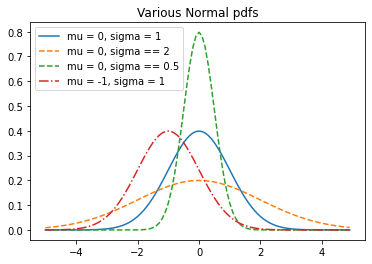

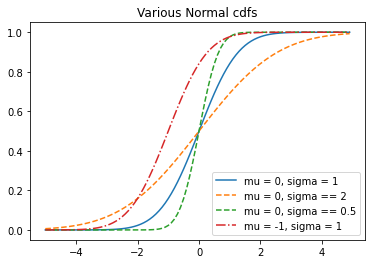

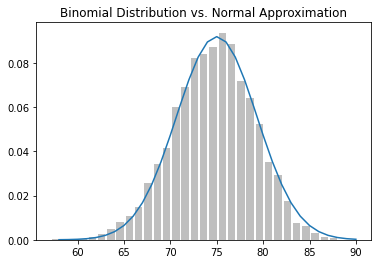

In [3]:
import random
import import_ipynb
from Chapter_6 import inverse_normal_cdf

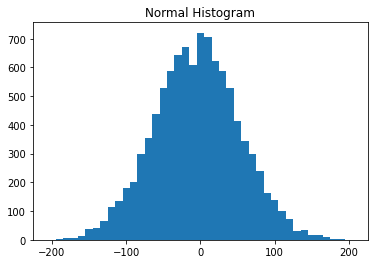

In [4]:
random.seed(0)

# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random())
          for _ in range(10000)]

#plot_histogram(uniform, 10, "Uniform Histogram")
plot_histogram(normal, 10, "Normal Histogram")

In [0]:
# Two dimensions
def random_normal() -> float:
  """Returns a random draw from a standard normal distribution"""
  return inverse_normal_cdf(random.random())

In [0]:
xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

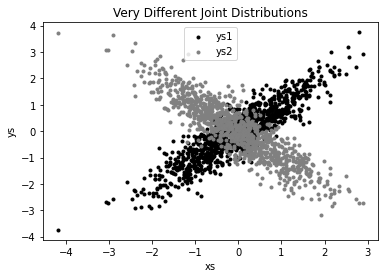

In [7]:
# Same histogram but different joint distributions
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

importing Jupyter notebook from Chapter_5.ipynb


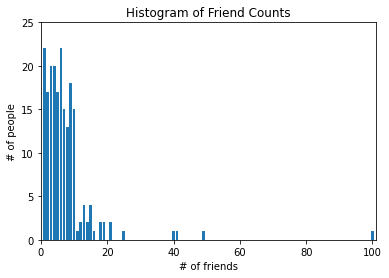

204 1 100.0 1 49
6.0
importing Jupyter notebook from Chapter_4.ipynb
0.9010493686379609
-0.8920981526880033


In [8]:
# The difference is also apparent when you look at the correlations
from Chapter_5 import correlation

print(correlation(xs, ys1))
print(correlation(xs, ys2))

In [0]:
from Chapter_4 import Matrix, Vector, make_matrix

def correlation_matrix(data: List[Vector]) -> Matrix:
  """
  Returns the len(data) x len(data) matrix whose (i, j)-th entry
  is the correlation between data[i] and data[j]
  """
  def correlation_ij(i: int, j: int) -> float:
    return correlation(data[i], data[j])

  return make_matrix(len(data), len(data), correlation_ij)

# corr_data is a list of four 100-d vectors
# Hmmm..don't see this in Joel's github repo. Not sure where the data is.
#num_vectors = len(corr_data)
#fig, ax = plt.subplots(num_vectors, num_vectors)

#for i in range(num_vectors):
#  for j in range(num_vectors):
#    #Scatter column_j on the x-axis vs. column_i on the y-axis
#    if i != j: ax[i][j].scatter(corr_data[j], corr_data[i])

    # unless i == j, in which case show the series name
#    else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
#                            xycoords='axes fraction',
#                            ha="center", va="center")
    
    # Then hide axis labels except left and bottom charts
#    if i < num_vectors - 1: ax[i][j].xaxis.set_visible(False)
#    if j > 0: ax[i][j].yaxis.set_visible(False)

# Fix the bottom-right and top-left axis labels, which are wrong because
# their charts only have text in them
#ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
#ax[0][0].set_ylim(ax[0][1].get_ylim())

#plt.show()

In [10]:
import datetime

stock_price = {'closing_price': 102.06,
               'date': datetime.date(2014, 8, 29),
               'symbol': 'AAPL'}
print(stock_price)
# But this can be error prone
stock_price['cosing_price'] = 103.06
print(stock_price)


{'closing_price': 102.06, 'date': datetime.date(2014, 8, 29), 'symbol': 'AAPL'}
{'closing_price': 102.06, 'date': datetime.date(2014, 8, 29), 'symbol': 'AAPL', 'cosing_price': 103.06}


In [0]:
# Python has named tuples
from collections import namedtuple

StockPrice = namedtuple('StockPrice', ['symbol', 'date', 'closing_price'])
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03

from typing import NamedTuple

class StockPrice(NamedTuple):
  symbol: str
  date: datetime.date
  closing_price: float

  def is_high_tech(self) -> bool:
    """It's a class, so we can add methods too"""
    return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()


In [0]:
# Dataclasses in Python are new in Python 3.7
from dataclasses import dataclass

@dataclass
class StockPrice2:
  symbol: str
  date: datetime.date
  closing_price: float

  def is_high_tech(self) -> bool:
    """It's a class, so we can add methods too"""
    return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price2 = StockPrice2('MSFT', datetime.date(2018, 12, 14), 102.06)

assert price2.symbol == 'MSFT'
assert price2.closing_price == 102.06
assert price2.is_high_tech()

# You can modify a dataclass instance unlike a NamedTuple
# stock split
price2.closing_price /= 2
assert price2.closing_price == 51.03

In [0]:
# But you still have the problem of writing props that you didn't intend, so we 
# won't use these
price2.cosing_price = 75 # oops

In [0]:
# Cleaning and munging
from dateutil.parser import parse

def parse_row(row: List[str]) -> StockPrice:
  symbol, date, closing_price = row
  return StockPrice(symbol=symbol,
                    date=parse(date).date(),
                    closing_price=float(closing_price))
  
# Now test our function
stock = parse_row(["MSFT", "2018-12-14", "106.03"])

assert stock.symbol == "MSFT"
assert stock.date == datetime.date(2018, 12, 14)
assert stock.closing_price == 106.03

In [0]:
from typing import Optional
import re

def try_parse_row(row: List[str]) -> Optional[StockPrice]:
  symbol, date_, closing_price_ = row

  #Stock price should be all capital letters
  if not re.match(r"^[A-Z]+$", symbol):
    return None
  
  try:
    date = parse(date_).date()
  except:
    return None
  
  try: 
    closing_price = float(closing_price_)
  except:
    return None

  return StockPrice(symbol, date, closing_price)

# Should return None for errors
assert try_parse_row(["MSFT0", "2018-12-14", "106.03"]) is  None
assert try_parse_row(["MSFT", "2018-12--14", "106.03"]) is  None
assert try_parse_row(["MSFT", "2018-12--14", "x"]) is  None


In [16]:
# Stock prices
stock_prices = """AAPL,6/20/2014,90.91
MSFT,6/20/2014,41.68
FB,6/20/2014,64.5
AAPL,6/19/2014,91.86
MSFT,6/19/2014,n/a
FB,6/19/2014,64.34
"""
text_file = open("stock_prices.csv", "w+");text_file.write(stock_prices);text_file.close()

import csv

data: List[StockPrice] = []

with open("stock_prices.csv") as f:
  reader = csv.reader(f)
  for row in reader:
    maybe_stock = try_parse_row(row)
    if maybe_stock is None:
      print(f"skipping invalid row: {row}")
    else:
      data.append(maybe_stock)

skipping invalid row: ['MSFT', '6/19/2014', 'n/a']


In [17]:
# Let's read in a bunch of data so we can start manipulating it
with open("stocks.csv", "r") as f:
  reader = csv.DictReader(f)
  rows = [[row['Symbol'], row['Date'], row['Close']]
          for row in reader]

# skip header
data = [try_parse_row(row) for row in rows]

# Make sure they are all loaded successfully
assert data
assert all(sp is not None for sp in data)

max_aapl_price = max(stock_price.closing_price
                     for stock_price in data
                     if stock_price.symbol == "AAPL")
print(max_aapl_price)

232.070007


In [0]:
from collections import defaultdict

max_prices: Dict[str, float] = defaultdict(lambda: float('-inf'))

for sp in data:
  symbol, closing_price = sp.symbol, sp.closing_price
  if closing_price > max_prices[symbol]:
    max_prices[symbol] = closing_price

from typing import List

# Collect the prices by symbol
prices: Dict[str, List[StockPrice]] = defaultdict(list)

for sp in data:
  prices[sp.symbol].append(sp)

# Order the prices by date
prices = {symbol: sorted(symbol_prices)
          for symbol, symbol_prices in prices.items()}

def pct_change(yesterday: StockPrice, today: StockPrice) -> float:
  return today.closing_price / yesterday.closing_price - 1

class DailyChange(NamedTuple):
  symbol: str
  date: datetime.date
  pct_change: float

def day_over_day_changes(prices: List[StockPrice]) -> List[DailyChange]:
  """
  Assumes prices are for one stock and are in order
  """
  return [DailyChange(symbol=today.symbol,
                      date=today.date,
                      pct_change=pct_change(yesterday, today))
          for yesterday, today in zip(prices, prices[1:])]

all_changes = [change
               for symbol_prices in prices.values()
               for change in day_over_day_changes(symbol_prices)]

In [0]:
max_change = max(all_changes, key=lambda change: change.pct_change)
assert max_change.symbol == 'AAPL'
assert max_change.date == datetime.date(1997, 8, 6)
assert 0.33 < max_change.pct_change < 0.34

min_change = min(all_changes, key=lambda change: change.pct_change)
assert min_change.symbol == 'AAPL'
assert min_change.date == datetime.date(2000, 9, 29)
assert -0.52 < min_change.pct_change < -0.51

In [0]:
# Now we can find which month is best to invest. Ha!
changes_by_month: List[DailyChange] = {month: [] for month in range(1, 13)}

for change in all_changes:
  changes_by_month[change.date.month].append(change)

avg_daily_change = {
    month: sum(change.pct_change for change in changes) / len(changes)
    for month, changes in changes_by_month.items()
}

# Should be october
assert avg_daily_change[10] == max(avg_daily_change.values())

In [0]:
# Rescaling so that each dimension has a mean of 0 and std. dev. of 1
from typing import Tuple

from Chapter_4 import vector_mean
from Chapter_5 import standard_deviation

def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
  """returns the mean and standard deviation for each position"""
  dim = len(data[0])

  means = vector_mean(data)
  stdevs = [standard_deviation([vector[i] for vector in data])
            for i in range(dim)]
  
  return means, stdevs

vectors = [[-3, -1, 1], [-1, 0, 1], [1, 1, 1]]
means, stdevs = scale(vectors)
assert means == [-1, 0, 1]
assert stdevs == [2, 1, 0]

In [0]:
def rescale(data: List[Vector]) -> List[Vector]:
  """
  Rescales the input data so that each position has mean 0
  and standard deviation of 1. (Leaves a position as is if
  its standard deviation is 0)
  """
  dim = len(data[0])
  means, stdevs = scale(data)

  # Make a copy of each vector
  rescaled = [v[:] for v in data]

  for v in rescaled:
    for i in range(dim):
      if stdevs[i] > 0:
        v[i] = (v[i] - means[i]) / stdevs[i]
  
  return rescaled

# Test
means, stdevs = scale(rescale(vectors))
assert means == [0,0,1]
assert stdevs == [1,1,0]

# Use good judgement here, because if your data is already pretty clean or narrow,
# the remaining variation could just be noise, and you might not want to put
# the std. dev. on equal footng with other dimensions' deviations


In [23]:
# An aside: tqdm
!pip install tqdm

import tqdm

for i in tqdm.tqdm(range(100)):
  # do something slow
  _ = [random.random() for _ in range(1000000)]

100%|██████████| 100/100 [00:12<00:00,  7.75it/s]


In [24]:
from typing import List

def primes_up_to(n: int) -> List[int]:
  primes = [2]

  with tqdm.trange(3, n) as t:
    for i in t:
      # i is prime if no smaller prime divides it
      i_is_prime = not any(i % p == 0 for p in primes)
      if i_is_prime:
        primes.append(i)

      t.set_description(f"{len(primes)} primes")

  return primes

my_primes = primes_up_to(100_000)

9461 primes:  98%|█████████▊| 98428/99997 [01:40<00:01, 1000.86it/s]

In [0]:
# Dimensionality reduction with PCA
# Let's copy some data from Joel
pca_data = [
[20.9666776351559,-13.1138080189357],
[22.7719907680008,-19.8890894944696],
[25.6687103160153,-11.9956004517219],
[18.0019794950564,-18.1989191165133],
[21.3967402102156,-10.8893126308196],
[0.443696899177716,-19.7221132386308],
[29.9198322142127,-14.0958668502427],
[19.0805843080126,-13.7888747608312],
[16.4685063521314,-11.2612927034291],
[21.4597664701884,-12.4740034586705],
[3.87655283720532,-17.575162461771],
[34.5713920556787,-10.705185165378],
[13.3732115747722,-16.7270274494424],
[20.7281704141919,-8.81165591556553],
[24.839851437942,-12.1240962157419],
[20.3019544741252,-12.8725060780898],
[21.9021426929599,-17.3225432396452],
[23.2285885715486,-12.2676568419045],
[28.5749111681851,-13.2616470619453],
[29.2957424128701,-14.6299928678996],
[15.2495527798625,-18.4649714274207],
[26.5567257400476,-9.19794350561966],
[30.1934232346361,-12.6272709845971],
[36.8267446011057,-7.25409849336718],
[32.157416823084,-10.4729534347553],
[5.85964365291694,-22.6573731626132],
[25.7426190674693,-14.8055803854566],
[16.237602636139,-16.5920595763719],
[14.7408608850568,-20.0537715298403],
[6.85907008242544,-18.3965586884781],
[26.5918329233128,-8.92664811750842],
[-11.2216019958228,-27.0519081982856],
[8.93593745011035,-20.8261235122575],
[24.4481258671796,-18.0324012215159],
[2.82048515404903,-22.4208457598703],
[30.8803004755948,-11.455358009593],
[15.4586738236098,-11.1242825084309],
[28.5332537090494,-14.7898744423126],
[40.4830293441052,-2.41946428697183],
[15.7563759125684,-13.5771266003795],
[19.3635588851727,-20.6224770470434],
[13.4212840786467,-19.0238227375766],
[7.77570680426702,-16.6385739839089],
[21.4865983854408,-15.290799330002],
[12.6392705930724,-23.6433305964301],
[12.4746151388128,-17.9720169566614],
[23.4572410437998,-14.602080545086],
[13.6878189833565,-18.9687408182414],
[15.4077465943441,-14.5352487124086],
[20.3356581548895,-10.0883159703702],
[20.7093833689359,-12.6939091236766],
[11.1032293684441,-14.1383848928755],
[17.5048321498308,-9.2338593361801],
[16.3303688220188,-15.1054735529158],
[26.6929062710726,-13.306030567991],
[34.4985678099711,-9.86199941278607],
[39.1374291499406,-10.5621430853401],
[21.9088956482146,-9.95198845621849],
[22.2367457578087,-17.2200123442707],
[10.0032784145577,-19.3557700653426],
[14.045833906665,-15.871937521131],
[15.5640911917607,-18.3396956121887],
[24.4771926581586,-14.8715313479137],
[26.533415556629,-14.693883922494],
[12.8722580202544,-21.2750596021509],
[24.4768291376862,-15.9592080959207],
[18.2230748567433,-14.6541444069985],
[4.1902148367447,-20.6144032528762],
[12.4332594022086,-16.6079789231489],
[20.5483758651873,-18.8512560786321],
[17.8180560451358,-12.5451990696752],
[11.0071081078049,-20.3938092335862],
[8.30560561422449,-22.9503944138682],
[33.9857852657284,-4.8371294974382],
[17.4376502239652,-14.5095976075022],
[29.0379635148943,-14.8461553663227],
[29.1344666599319,-7.70862921632672],
[32.9730697624544,-15.5839178785654],
[13.4211493998212,-20.150199857584],
[11.380538260355,-12.8619410359766],
[28.672631499186,-8.51866271785711],
[16.4296061111902,-23.3326051279759],
[25.7168371582585,-13.8899296143829],
[13.3185154732595,-17.8959160024249],
[3.60832478605376,-25.4023343597712],
[39.5445949652652,-11.466377647931],
[25.1693484426101,-12.2752652925707],
[25.2884257196471,-7.06710309184533],
[6.77665715793125,-22.3947299635571],
[20.1844223778907,-16.0427471125407],
[25.5506805272535,-9.33856532270204],
[25.1495682602477,-7.17350567090738],
[15.6978431006492,-17.5979197162642],
[37.42780451491,-10.843637288504],
[22.974620174842,-10.6171162611686],
[34.6327117468934,-9.26182440487384],
[34.7042513789061,-6.9630753351114],
[15.6563953929008,-17.2196961218915],
[25.2049825789225,-14.1592086208169]
]

from Chapter_4 import subtract

def de_mean(data: List [Vector]) -> List[Vector]:
  """Recenters the data to have mean 0 in every dimension"""
  mean = vector_mean(data)
  return [subtract(vector, mean) for vector in data]

from Chapter_4 import magnitude

def direction(w: Vector) -> Vector:
  mag = magnitude(w)
  return [w_i / mag for w_i in w]

from Chapter_4 import dot

def directional_variance(data: List[Vector], w: Vector) -> float:
  """
  Returns the variance of x in the direction of w
  """
  w_dir = direction(w)
  return sum(dot(v, w_dir) ** 2 for v in data)

def directional_variance_gradient(data)